# READ TIME

In [35]:
def read_time(INPUT, MODs, C):

    STARTN = 2**23
    ENDN = 2**28
    DN = STARTN
    SEED = 9000
    SAMPLES = 10
    PATH="outputs"
    #INPUT = "normal8"
    #MOD = "power-gpu-pseudohull"
    #C=1
    import pandas as pd

    # define df_pseudohull as empty df #timestep       power           acc-energy      avg-power       dt              acc-time 
    out = pd.DataFrame(columns=["size", "time", "seed"])

    for N in range(STARTN, ENDN + 1, DN):
        for k in range(1, SAMPLES + 1):
            SEED2 = SEED * k
            for MOD in MODs:
                INPUT_FILE = f"{PATH}/{INPUT}/{MOD}_{N+C}_{SEED2}.dat"
                # print(INPUT_FILE)
                df = pd.read_csv(INPUT_FILE, sep=r'\s+', skiprows=1, names=["timestep", "power", "acc-energy", "avg-power", "dt", "acc-time"])
                if not df.empty:
                    last_row = df.iloc[-1]
                    acc_time = last_row['acc-time']
                    df_aux = pd.DataFrame({'size': [N], 'time': [acc_time], 'seed': [SEED2], 'mod': [MOD]})
                    # Only concat if df_aux is not empty and has valid columns
                    if not df_aux.empty and df_aux.notna().all(axis=None):
                        out = pd.concat([out, df_aux], ignore_index=True)
                else:
                    print(f"Warning: {INPUT_FILE} is empty, skipping.")

    #print (out)

    # summ time by seed and size
    sum_time_by_seed = out.groupby(['size', 'seed'])['time'].sum().reset_index()
    sum_time_by_seed = sum_time_by_seed.sort_values(by=['size', 'seed'])

    #print((sum_time_by_seed))

    # Group by 'size' and calculate the average 'time'
    avg_time_by_size = sum_time_by_seed.groupby('size')['time'].mean().reset_index()

    return avg_time_by_size


In [40]:
normal8 = read_time("normal8", ["power-gpu-pseudohull", "power-gpu-pseudohull"], 1)
normal20 = read_time("normal20", ["power-gpu-pseudohull"], 1)


/tmp/ipykernel_2172/2471295692.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([out, df_aux], ignore_index=True)


/tmp/ipykernel_2172/2471295692.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([out, df_aux], ignore_index=True)


In [42]:
normalGPU = read_time("normalGPU",["power-gpu-gpu_find_extremes_axis", "power-gpu-gpu_find_corners", "power-gpu-gpu_fill_polyhedron", "power-gpu-gpu_filter", "power-gpu-gpu_compaction"], 0)
normalRTX = read_time("normalRTX", ["power-rtx-gpu_find_extremes_axis", "power-rtx-gpu_find_corners", "power-rtx-gpu_fill_polyhedron", "power-rtx-gpu_launch_rtx", "power-rtx-gpu_compaction"], 0)

/tmp/ipykernel_2172/2471295692.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([out, df_aux], ignore_index=True)
/tmp/ipykernel_2172/2471295692.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([out, df_aux], ignore_index=True)


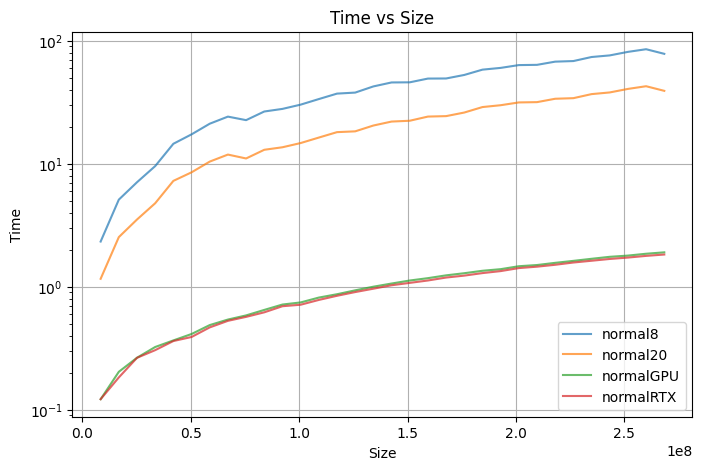

In [47]:
import matplotlib.pyplot as plt

# Convert 'size' to int if it's not already
normal8['size'] = normal8['size'].astype(int)
normal20['size'] = normal20['size'].astype(int)
normalGPU['size'] = normalGPU['size'].astype(int)
normalRTX['size'] = normalRTX['size'].astype(int)

plt.figure(figsize=(8, 5))
plt.plot(normal8['size'], normal8['time'], label='normal8', alpha=0.7)
plt.plot(normal20['size'], normal20['time'], label='normal20', alpha=0.7)
plt.plot(normalGPU['size'], normalGPU['time'], label='normalGPU', alpha=0.7)
plt.plot(normalRTX['size'], normalRTX['time'], label='normalRTX', alpha=0.7)
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Time vs Size')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# READ POWER